<a href="https://colab.research.google.com/github/Akbar-fitriawan/tutorial-machine-learning/blob/main/nb_classification_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [103]:
df = pd.read_csv("/content/titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
df.drop(["Cabin"], axis=1, inplace=True)

In [107]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [108]:
df["Embarked"].fillna("S", inplace=True)

In [109]:
embarked ={
    "Embarked":{
        "S":0,
        "C":1,
        "Q":2
    }
}

df.replace(embarked, inplace=True)

In [110]:
df.dropna(inplace=True, how='any')

In [111]:
df["Fare"] = df["Fare"].astype(int)
df["Age"] = df["Age"].astype(int)

In [112]:
df = df.drop(["PassengerId","Name","Ticket"], axis=1)

In [113]:
sex = {
    "Sex":{
        "male":0,
        "female":1
    }
}
df.replace(sex, inplace=True)

In [114]:
pria = df["Age"].loc[df["Sex"] == 0].mean()
wanita = df["Age"].loc[df["Sex"] == 1].mean()
print(f"Pria: {pria}, wanita : {wanita}")

Pria: 30.70198675496689, wanita : 27.904214559386972


In [115]:
df["Age"].loc[(df["Sex"] == 0) & (df["Age"].isnull()==True)] = 30.725
df["Age"].loc[(df["Sex"] == 1) & (df["Age"].isnull()==True)] = 27.914

In [116]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7,0
1,1,1,1,38.0,1,0,71,1
2,1,3,1,26.0,0,0,7,0
3,1,1,1,35.0,1,0,53,0
4,0,3,0,35.0,0,0,8,0


<Axes: >

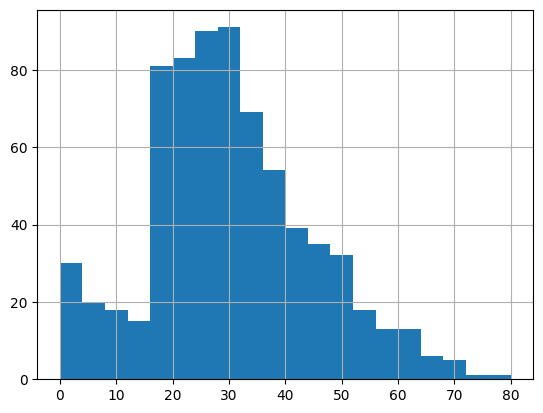

In [117]:
df["Age"].hist(bins=20)

<Axes: >

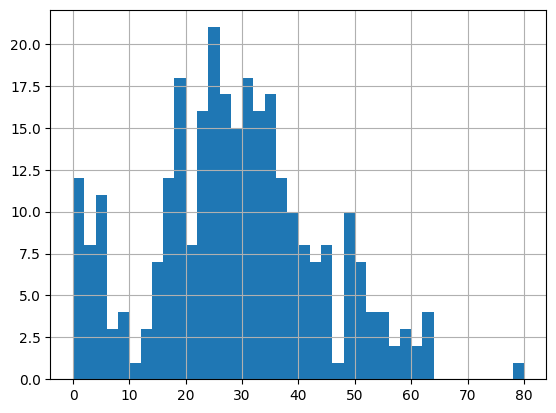

In [118]:
df["Age"].loc[df["Survived"] == 1].hist(bins=40)

In [119]:
umur = [0,5,15,25,30,35,40,45,50,200]
umur_label = ['0-5', '5-15', '15-25', '25-30', '30-35', '35-40', '40-45', '45-50', '>50']

kelompok_umur = pd.cut(df["Age"], umur, labels=umur_label)
df["kelompokUmur"] = kelompok_umur
df["kelompokUmurKode"] = df["kelompokUmur"].cat.codes
df['kelompokUmur'].value_counts()

15-25    218
25-30    110
30-35     86
35-40     69
>50       64
40-45     47
5-15      39
0-5       37
45-50     37
Name: kelompokUmur, dtype: int64

<Axes: >

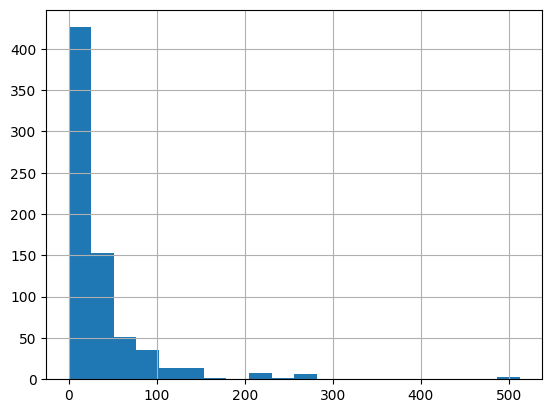

In [120]:
df["Fare"].hist(bins=20)

In [121]:
harga = [0, 10, 30, 35, 80, 1000]
harga_label = ['0-10', '10-30', '30-35', '35-80', '>80']
kelompok_harga = pd.cut(df["Fare"], harga, labels=harga_label)
df["kelompokHarga"] = kelompok_harga
df["kelompokHargaKode"] = df["kelompokHarga"].cat.codes

In [122]:
jumlahOrang = df["SibSp"].astype(int) + df["Parch"].astype(int) + 1
df["JumlahOrang"] = jumlahOrang.astype(int)

In [123]:
from sklearn.model_selection import train_test_split
features = df[["Pclass","Embarked","Sex","kelompokUmurKode","kelompokHargaKode","JumlahOrang"]]
label = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=0)

In [127]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import sklearn.metrics as met
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [128]:
y_pred = gnb.predict(X_test)
accuracy = met.accuracy_score(y_test, y_pred)
precision = met.precision_score(y_test, y_pred)
score = classification_report(y_test, y_pred)
print(f"Accuracy : {accuracy}, Precision : {precision}")
print(score)

Accuracy : 0.7486033519553073, Precision : 0.6781609195402298
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       103
           1       0.68      0.78      0.72        76

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



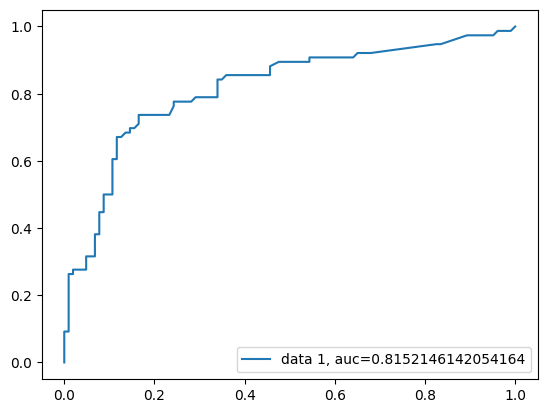

In [129]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp,tp, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()